<a href="https://colab.research.google.com/github/DhruvArora96/Hands-On/blob/master/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
X = 2*np.random.rand(100,1)
Y=4+3*X+np.random.randn(100,1)

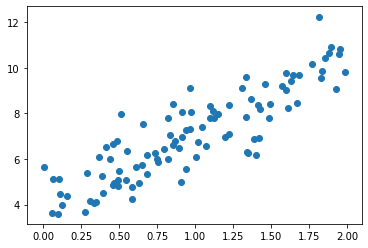

In [0]:
plt.scatter(X,Y)

In [0]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

In [0]:
theta_best

array([[3.97037876],
       [3.17270204]])

In [0]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.97037876],
       [10.31578285]])

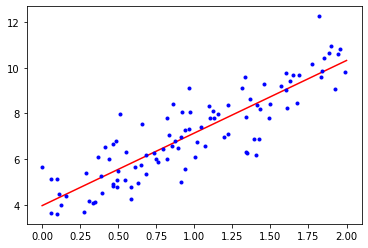

In [0]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,Y,"b.")
plt.show()

In [0]:
######################Gradient Descent##############################

In [0]:
eta = 0.1 
n_iterations = 1000
m=100

theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-Y)
    theta = theta - eta*gradients
theta

array([[3.97037876],
       [3.17270204]])

In [0]:
##################Stochastic Gradient Descent###########################

In [0]:
n_epochs = 50
t0,t1 = 5,50
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi=Y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta-eta*gradients

In [0]:
theta

array([[3.92128841],
       [3.21109869]])

In [0]:
theta

array([[3.92128841],
       [3.21109869]])

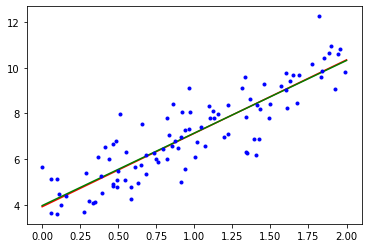

In [0]:
y_predict1 = X_new_b.dot(theta)
plt.plot(X_new,y_predict1,"r-")
plt.plot(X_new,y_predict,"g-")
plt.plot(X,Y,"b.")
plt.show()

In [0]:
import numpy as np
m=100
X=6*np.random.rand(m,1)-3
y = 0.5 *X**2+X*2+2+np.random.randn(m,1)

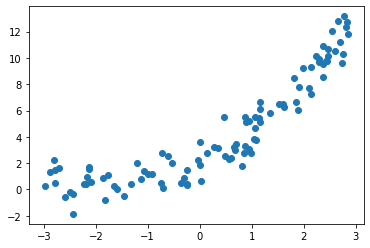

In [0]:
plt.scatter(X,y)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.81862433]), array([[2.09059356, 0.53212379]]))

In [0]:
y_predict = lin_reg.coef_[0][1]*X**2+lin_reg.coef_[0][0]*X+lin_reg.intercept_

In [14]:
plt.scatter(X,y_predict)

NameError: ignored

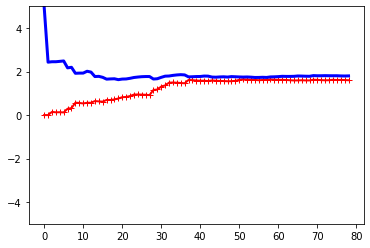

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')
    plt.ylim([-5,5])
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

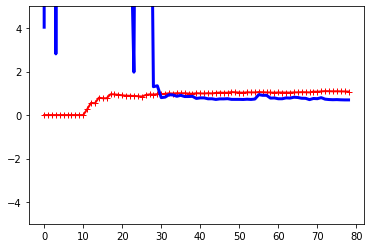

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
polynomial_regression=Pipeline((
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
))
plot_learning_curves(polynomial_regression,X,y)

In [0]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=2,solver="cholesky")
ridge_reg.fit(X_poly,y)
ridge_reg.predict([[1.5,1.5**2]])

array([[4.51152531]])

In [8]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([6.17110777])

In [4]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([6.14292938])

In [5]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(X,y)
elastic.predict([[1.5]])

array([6.1155168])

# Early Stopping

In [0]:
from sklearn.pipeline import Pipeline
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False))
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [22]:
from sklearn.base import clone
sgd = SGDRegressor(max_iter=1,warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005)
min_val_error = float("inf")
best_epoch=None
best_model =None
for epoch in range(1000):
    sgd.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd.predict(X_val_poly_scaled)
    val_error= mean_squared_error(y_val_predict,y_val)
    if val_error<min_val_error:
        min_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linea

In [23]:
best_epoch

981

# Logistic Regression